## <center>单个神经元</center>

### 1 激活函数

因为神经网络的数学基础是处处可微的,所以选取的激活函数要保证数据输入与输出也是可微的

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
# 可以有效的避免jupyter notebook 占用大量显存的问题
gpu_no = '0'
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_no
# 定义TensorFlow配置
config = tf.ConfigProto()
# 配置GPU内存分配方式，按需增长，很关键
config.gpu_options.allow_growth = True
# 配置可使用的显存比例
config.gpu_options.per_process_gpu_memory_fraction = 0.1
# 在创建session的时候把config作为参数传进去
sess = tf.Session(config = config)

#### (1) sigmoid 激活函数
sigmoid 激活函数非常常见,数学表达式为:
$$f(x) = \frac{1}{1+e^{-x}}$$

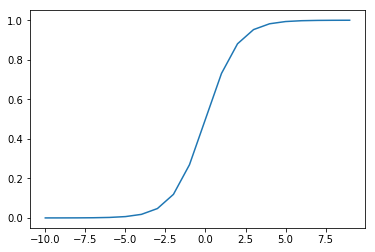

In [2]:
# 为了画图,所以使用numpy类型的输入数据
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
# 通过tensorflow计算后,就变成了tensor,不能直接画图
y = tf.nn.sigmoid(x)
# 通过sess.run 运算后，数据类型变成了numpy类型
y_ = sess.run(y)
plt.plot(x,y_)

从图中可以看出,有效的范围是[-6,6],效果比较好的范围是[-3,3]

#### (2) tanh 激活函数

tanh 激活函数的数学表达式为:
$$tanh(x) = 2\times sigmoid(2x) -1$$

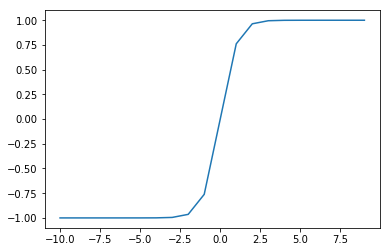

In [3]:
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
y = tf.nn.tanh(x)
y_ = sess.run(y)
plt.plot(x,y_)

#### (3) relu 激活函数

前面介绍的 sigmoid 和 tanh 函数都存在饱和问题,而 relu 函数能有效的避免这个问题.其数学表达式为:

$$f(x) = max(0,x)$$

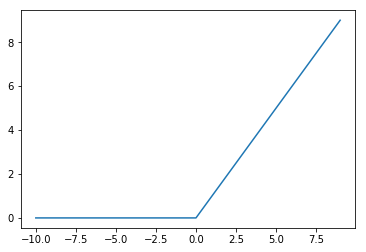

In [4]:
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
y = tf.nn.relu(x)
y_ = sess.run(y)
plt.plot(x,y_)

#### (4) softplus 激活函数

softplus 与 relu 非常类似,二者的区别在于 softplus 更加平滑,但是计算量大.数学表达式为:

$$f(x) = ln(1+e^x)$$

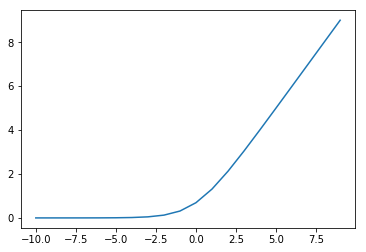

In [5]:
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
y = tf.nn.softplus(x)
y_ = sess.run(y)
plt.plot(x,y_)

#### (5) elus 激活函数

elus 激活函数收敛速度比 relu 函数<font color='red'>更快</font>,使用 elus 激活函数时,<font color='red'>不使用批处理能获得更好的效果</font>,同时 elus 激活函数不使用批处理的效果比 relu 函数加入批处理的<font color='red'>效果更好</font>. 数学公式如下:
$$\begin{equation}
f(x) = \left\{
\begin{array}{rl}
x\qquad\quad&(x \geq 0)\\
a\cdot (e^x-1) & (otherwise)
\end{array}
\right.
\end{equation}$$

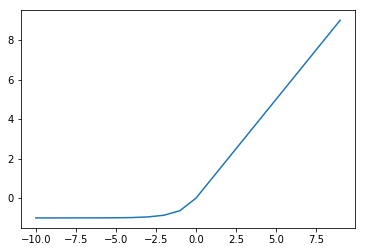

In [6]:
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
y = tf.nn.elu(x)
y_ = sess.run(y)
plt.plot(x,y_)

#### (6) swish 激活函数

swish 函数是谷歌提出的效果优于 relu 的激活函数. 其数学表达式如下:
$$f(x)= x \cdot sigmoid(\beta x)$$

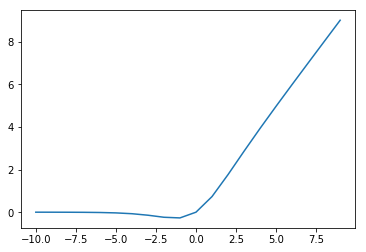

In [7]:
def swish(x,beta=1):
    return x * tf.nn.sigmoid(beta*x)
x = np.arange(-10.0,10.0)
x = np.expand_dims(a=x,axis=1)
y = swish(x)
y_ = sess.run(y)
plt.plot(x,y_)

### 2 softmax 算法

softmax 可以理解为 sigmoid 的扩展, softmax 计算出来的是每一类的概率,其计算公式如下:

$$softmax = \frac{e^{logits}}{reduce\_sum(e^{logits},dim)}$$

In [8]:
# softmax 就类似于一个归一化
x = np.random.randn(3,4)
y = tf.nn.softmax(x)
print(sess.run(y))
y = tf.nn.log_softmax(x)
print(sess.run(y))

[[0.37502693 0.09255862 0.10778397 0.42463048]
 [0.44845786 0.24642716 0.15856022 0.14655476]
 [0.70719163 0.14781721 0.04785833 0.09713283]]
[[-0.98075744 -2.37991309 -2.22762636 -0.85653594]
 [-0.80194057 -1.40068881 -1.84162083 -1.92035612]
 [-0.3464536  -1.9117788  -3.03951013 -2.33167589]]


### 3 损失函数

#### (1) 均值平方差 MSE
$$MSE = \frac{1}{n}\sum_{t=1}^n(pred-label)^2$$

均方误差的值越小,表明模型越好. 类似的损失函数还有均方根误差 RMES (MSE 开平方), 平均绝对值误差 MAD (预测值-真实值 的绝对值取平均值)

<font color='red'>注意:预测值与真实值需要控制在相同的数据分布内,假设预测值经过 sigmoid 激活函数的到的取值范围在 0-1之间,那么真实值也要归一化成0-1之间.这样做loss计算时才会有较好的效果.</font>

In [9]:
pred = np.random.randn(10)
y = np.random.randn(10)
# 在tensorflow中没有提供现成的计算mse的算法,需要自己写
# MSE计算方法
mse = tf.reduce_mean(tf.square(y-pred))
# RMSE计算方法
rmse = tf.sqrt(tf.reduce_mean(tf.square(y-pred)))
# MAD计算方法
mad = tf.reduce_mean(tf.abs(y-pred))
print(sess.run(mse))
print(sess.run(rmse))
print(sess.run(mad))

3.2844668436806543
1.8123098089677312
1.4922478727638162


#### (2) 交叉熵
$$cross\_entropy = -\frac{1}{n}\sum_x\left[y\ln pred +(1-y)\ln(1-pred)\right]$$

交叉熵是一种非常常用的损失函数,一般用在分类问题中.用于表示输入样本属于某一类的概率,交叉熵越小,代表预测越准确.

In [10]:
# 在交叉熵计算中 logits 代表预测标签值,sigmoid 和 softmax 的输入数据必须类似于 one_hot 编码
# 这里的pred是没有经过softmax的,在tensorflow中的交叉熵函数会帮我们计算softmax,所以不需要.
pred = [[2.0,0.5,1.1],[1.2,0.5,0.2]]
y = [[0,0,1.0],[1.0,0,0]]
# 通过这种方法计算出来的交叉熵,是一个向量,为了算整体的损失,需要使用tf.reduce_mean 或 tf.reduce_sum
sigmoid_cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=pred,labels=y)
softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)
print(sess.run(sigmoid_cross_entropy))
print(sess.run(softmax_cross_entropy))

# 为了求整体的交叉熵,需要进行求均值 或者 求和
# softmax 计算中本来就是使用了一次求和,所以求均值更好
sigmoid_cross_entropy = tf.reduce_mean(sigmoid_cross_entropy)
softmax_cross_entropy = tf.reduce_mean(softmax_cross_entropy)
print(sess.run(sigmoid_cross_entropy))
print(sess.run(softmax_cross_entropy))

# sparse 交叉熵 预测和真实标签不需要变成one-hot编码,
# 但是要求分类从0开始.加入2分类,那么预测值只能是0和1
# 从中可以看出最大的区别就是输入数据的格式与前两种有显著差别
pred = [[2.0,0.5,1.1],[1.2,0.5,0.2]]
y = [2,0]
sparse_cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=pred,labels=y)
sparse_cross_entropy = tf.reduce_mean(sparse_cross_entropy)
print(sess.run(sparse_cross_entropy))

[[2.126928   0.974077   0.28733534]
 [0.26328245 0.974077   0.79813886]]
[1.3883959  0.62297404]
0.9039731
1.005685
1.005685


### 4 梯度下降

常用的梯度下降算法可分为:批梯度下降,随机梯度下降,mini-batch梯度下降.
+ 批梯度下降: 遍历全部数据集算一次损失函数,然后算函数对各个参数的梯度.这种方法每更新一次参数,都要把数据集里的所有样本看一遍,计算量大.

+ 随机梯度下降:每看一个数据就计算一次损失函数,然后求梯度更新参数.这种方法速度比较快,但收敛性能不好,可能在最优点震荡.

+ mini-batch 梯度下降: 综合上面两种算法,将数据分成很多批,按批更新参数,这样一批中的所有数据共同决定本次梯度的方向,减少了随机性.


In [11]:
# 演示退化学习率
# 一定要设置trainable = False ,这样才会在训练过程中不改变训练样本
# 一定要加入global_step 才有效
global_step = tf.Variable(tf.constant(value=0,dtype=tf.int32),trainable=False)
initial_learning_rate = 0.1
# 设置指数衰减学习率,关键在于学习率的定义
learning_rate = tf.train.exponential_decay(learning_rate=initial_learning_rate,decay_rate=0.9,decay_steps=10,global_step=global_step)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
add_global = global_step.assign_add(1)
sess.run(tf.global_variables_initializer())
sess.run(learning_rate)
# 这种退化学习率非常有用,在大型的网络中,可以很方便的权衡训练精度和训练速度
for i in range(10):
    g,rate = sess.run([add_global,learning_rate])
    print(g,rate)

1 0.09895193
2 0.09791484
3 0.09688862
4 0.095873155
5 0.094868325
6 0.09387404
7 0.092890166
8 0.09191661
9 0.09095325
10 0.089999996


### 5 初始化学习参数

定义学习参数时,可以通过 get_variable 和 variable 这两种方式来定义, 对于一个网络模型,参数不同的初始化情况, 对网络的影响会很大.
+ 在tf.contrib.layers 函数中有个tf.contrib.layers.xavier_initializer 初始化函数, 用来在所有层中保持梯度大体相同.
+ 一般常用的初始化函数为 tf.truncated_normal 函数, 因为该函数有截断功能,可以生成相对温和的初始值.

In [12]:
# 对于需要多次利用计算图的时候,为了安全起见,都应该先使用 tf.reset_default_graph 重置
tf.reset_default_graph()
sess = tf.Session()
# 这里主要演示几种常见的初始化参数的方法,通常建议使用 tf.get_variable 来定义变量
a = tf.get_variable(name='v1',shape=[5],initializer=tf.zeros_initializer())
b = tf.get_variable(name='v2',shape=[5],initializer=tf.constant_initializer(value=1.))
c = tf.get_variable(name='v3',shape=[5],initializer=tf.ones_initializer())
d = tf.get_variable(name='v4',shape=[5],initializer=tf.random_uniform_initializer(0.,1.))
e = tf.get_variable(name='v5',shape=[5],initializer=tf.random_normal_initializer(0.,1.))
f = tf.get_variable(name='v6',shape=[5],initializer=tf.truncated_normal_initializer(0.,1.))
g = tf.get_variable(name='v7',shape=[5],initializer=tf.uniform_unit_scaling_initializer(1.0))
h = tf.get_variable(name='v8',shape=[5],initializer=tf.contrib.layers.xavier_initializer())
sess.run(tf.global_variables_initializer())
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))
print(sess.run(d))
print(sess.run(e))
print(sess.run(f))
print(sess.run(g))
print(sess.run(h))

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
[0.52285993 0.33003116 0.44954073 0.5192338  0.89607906]
[-0.02476746 -1.2187877  -0.7957878   0.5023944  -0.04462679]
[-0.8060326  -1.432039    0.44777212 -1.3357029   1.0467705 ]
[-1.0642078  -0.75762683 -1.6336234  -0.28300786  0.61543477]
[ 0.4766599   0.6390972  -0.5468193   0.39978385 -0.44605005]


### 6 maxout网络

Maxout 是将激活函数变成一个网络选择器,原理就是将多个神经元并列地放在一起,从它们的输出结果找到最大的那个,代表对特征响应最敏感,然后取这个神经元的结果参与后面的运算.

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/mnist/",one_hot = True)
x = tf.placeholder(dtype=tf.float32,shape=[None,784])
y = tf.placeholder(dtype=tf.float32,shape=[None,10])

# 构建网络结构
W = tf.Variable(initial_value=tf.random_normal(shape=[784,10]),dtype=tf.float32)
b = tf.Variable(initial_value=tf.zeros(shape=[10]),dtype=tf.float32)
z = tf.matmul(x,W)+b
# 通过 tf.reduce_max 操作之后, max_out 的 shape 变成了 (None,1)
maxout = tf.reduce_max(z,axis=1,keep_dims=True)
W2 = tf.Variable(tf.truncated_normal(shape=[1,10],stddev=0.1))
b2 = tf.Variable(tf.zeros(shape=[10]),dtype=tf.float32)
pred = tf.nn.softmax(tf.matmul(maxout,W2)+b2)
# 定义反向传播,也可以直接使用tensorflow自带的计算交叉熵函数
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),axis=1))
# 对模型进行优化
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

train_epochs = 10
batch_size = 100
display_step = 1
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(train_epochs):
        avg_cost = 0.0
        total_batch = int(mnist.train.num_examples/batch_size)
        for j in range(total_batch):
            batch_x,batch_y = mnist.train.next_batch(batch_size)
            _,loss = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
            avg_cost = avg_cost+loss/total_batch
        if (i+1)%display_step==0:
            # 如果两者最大值索引相等,那么就会该位置就会变成True,否则变成False
            correct_prediction = tf.equal(tf.argmax(pred,axis=1),tf.argmax(y,axis=1))
            acc = tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))
            accuracy = sess.run(acc,feed_dict={x:mnist.test.images,y:mnist.test.labels})
            print('epochs:',i+1,'loss:',avg_cost,'acc:',accuracy)

Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
epochs: 1 loss: 2.2984203806790426 acc: 0.1081
epochs: 2 loss: 2.2794773504950774 acc: 0.1288
epochs: 3 loss: 2.267269074266607 acc: 0.1426
epochs: 4 loss: 2.255839663852342 acc: 0.1555
epochs: 5 loss: 2.2424661445617664 acc: 0.1686
epochs: 6 loss: 2.228816448124973 acc: 0.1963
epochs: 7 loss: 2.214879458167336 acc: 0.1877
epochs: 8 loss: 2.20131246956912 acc: 0.189
epochs: 9 loss: 2.1861592115055424 acc: 0.2162
epochs: 10 loss: 2.1707379987023097 acc: 0.1871
